In [4]:
import sys
import pandas as pd
import numpy as py
import matplotlib
import seaborn
import sklearn
print(sys.version)
print(pd.__version__)
print(py.__version__)
print(matplotlib.__version__)
print(seaborn.__version__)
print(sklearn.__version__)

3.7.4 (default, Aug  9 2019, 18:34:13) [MSC v.1915 64 bit (AMD64)]
0.25.1
1.16.5
3.1.1
0.9.0
0.21.3


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [6]:
#Load the data
df=pd.read_csv('games.csv')

In [7]:
#Sampling the data
df.head()

,id,type,name,yearpublished,minplayers,maxplayers,playingtime,minplaytime,maxplaytime,minage,users_rated,average_rating,bayes_average_rating,total_owners,total_traders,total_wanters,total_wishers,total_comments,total_weights,average_weight
0,12333,boardgame,Twilight Struggle,2005.0,2.0,2.0,180.0,180.0,180.0,13.0,20113,8.33774,8.22186,26647,372,1219,5865,5347,2562,3.4785
1,120677,boardgame,Terra Mystica,2012.0,2.0,5.0,150.0,60.0,150.0,12.0,14383,8.28798,8.14232,16519,132,1586,6277,2526,1423,3.8939
2,102794,boardgame,Caverna: The Cave Farmers,2013.0,1.0,7.0,210.0,30.0,210.0,12.0,9262,8.28994,8.06886,12230,99,1476,5600,1700,777,3.7761
3,25613,boardgame,Through the Ages: A Story of Civilization,2006.0,2.0,4.0,240.0,240.0,240.0,12.0,13294,8.20407,8.05804,14343,362,1084,5075,3378,1642,4.1590
4,3076,boardgame,Puerto Rico,2002.0,2.0,5.0,150.0,90.0,150.0,12.0,39883,8.14261,8.04524,44362,795,861,5414,9173,5213,3.2943


In [10]:
df.shape

(81312, 20)

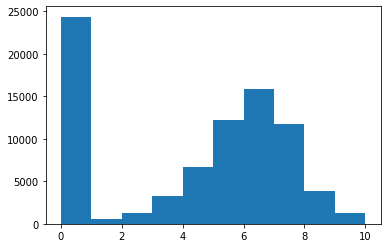

In [15]:
#Histogram of average ratings
plt.hist(df["average_rating"])
plt.show()

In [17]:
print(df[df["average_rating"]==0].iloc[0])
print(df[df["average_rating"]>0].iloc[0])

id                             318
type                     boardgame
name                    Looney Leo
yearpublished                    0
minplayers                       0
maxplayers                       0
playingtime                      0
minplaytime                      0
maxplaytime                      0
minage                           0
users_rated                      0
average_rating                   0
bayes_average_rating             0
total_owners                     0
total_traders                    0
total_wanters                    0
total_wishers                    1
total_comments                   0
total_weights                    0
average_weight                   0
Name: 13048, dtype: object
id                                  12333
type                            boardgame
name                    Twilight Struggle
yearpublished                        2005
minplayers                              2
maxplayers                              2
playingtime          

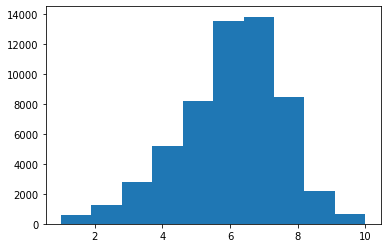

In [19]:
#Removing rows with 0 reviews
df=df[df["users_rated"]>0]
#Removing rows with 
df=df.dropna(axis=0)
plt.hist(df["average_rating"])
plt.show()

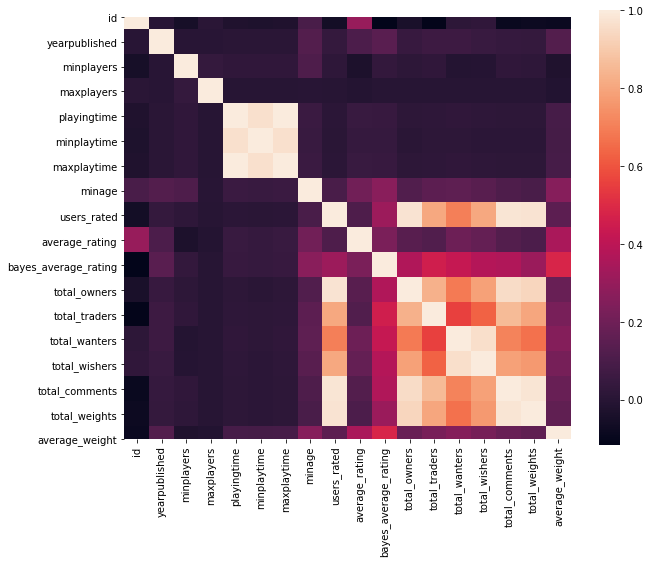

In [22]:
#Correlation Matrix
corrmat=df.corr()
fig=plt.figure(figsize=(10,8))
sns.heatmap(corrmat,square=True)
plt.show()

Removing Unnecessary data

In [25]:
columns=[c for c in df if c not in ["bayes_average_rating","id","average_rating","type","name"]]
target="average_rating"

In [29]:
#Generating training data
train=df.sample(frac=0.8,random_state=1)
test=df.loc[~df.index.isin(train.index)]
print(train.shape)
print(test.shape)

(45515, 20)
(11379, 20)


In [45]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
regressor=LinearRegression()
regressor.fit(train[columns],train[target])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [46]:
#Predictions for the test set
pred=regressor.predict(test[columns])
print(mean_squared_error(pred,test[target]))
from sklearn.metrics import r2_score
print(r2_score(pred,test[target]))

2.0788190326293243
-4.389571264102314


In [47]:
from sklearn.ensemble import RandomForestRegressor
rfreg=RandomForestRegressor(n_estimators=50,min_samples_leaf=10,random_state=1)
rfreg.fit(train[columns],train[target])
pred=rfreg.predict(test[columns])
print(mean_squared_error(pred,test[target]))
print(r2_score(pred,test[target]))

1.449498602379023
-0.43229662029040394


In [48]:
test[columns].iloc[0]

yearpublished      2011.0000
minplayers            2.0000
maxplayers            6.0000
playingtime         200.0000
minplaytime          60.0000
maxplaytime         200.0000
minage               14.0000
users_rated       15709.0000
total_owners      17611.0000
total_traders       273.0000
total_wanters      1108.0000
total_wishers      5581.0000
total_comments     3188.0000
total_weights      1486.0000
average_weight        3.6359
Name: 9, dtype: float64

In [50]:
#Make predictions with both models
ratings=regressor.predict(test[columns].iloc[0].values.reshape(1,-1))
rfratings=rfreg.predict(test[columns].iloc[0].values.reshape(1,-1))
print(ratings)
print(rfratings)

[8.12061283]
[7.89153486]


In [51]:
#Actual Value
test[target].iloc[0]

8.07933